In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df =pd.read_csv(r'C:\Users\Yash-Angelique\Desktop\2020\data\Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [110]:
#a scikit-learn class which is helpful in handling the missing data in the predictive model dataset
#create an object using SimpleImputer class
# replace nan value with the mean of that column

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
x=df.iloc[: , : -1].values
imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])
x



array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [112]:
y= df.iloc[: , -1].values
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [113]:
# Encoding categorical data 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ec=ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')
x=np.array(ec.fit_transform(x))
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [115]:
# encoding dependent variables

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)


[0 1 0 0 1 1 0 1 0 1]


In [116]:
# splitting the dataset into the training set
# training set: a subset to train a model.
# test set: a subset to test the trained model.

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [117]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [118]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [119]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [120]:
print(y_test)

[0 1]


In [126]:
# features help some features to not be dominated by others
from sklearn.preprocessing  import StandardScaler
s=StandardScaler()
x_train[: , 3:]=s.fit_transform(x_train[: , 3:])
x_test[: , 3:]=s.fit_transform(x_test[: , 3:])

In [127]:
x_train

array([[0.0, 0.0, 1.0, -0.1915918438457856, -1.0781259408412427],
       [0.0, 1.0, 0.0, -0.014117293757057902, -0.07013167641635401],
       [1.0, 0.0, 0.0, 0.5667085065333239, 0.6335624327104546],
       [0.0, 0.0, 1.0, -0.3045301939022488, -0.30786617274297895],
       [0.0, 0.0, 1.0, -1.901801144700799, -1.4204636155515822],
       [1.0, 0.0, 0.0, 1.1475343068237056, 1.2326533634535488],
       [0.0, 1.0, 0.0, 1.4379472069688966, 1.5749910381638883],
       [1.0, 0.0, 0.0, -0.7401495441200352, -0.5646194287757336]],
      dtype=object)

In [128]:
x_test

array([[0.0, 1.0, 0.0, -1.0, -1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0]], dtype=object)

In [132]:
# import the dataset

df_lr =pd.read_csv(r'C:\Users\Yash-Angelique\Desktop\2020\data\Salary_Data.csv')
df_lr

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [144]:
x=df_lr.iloc[: , : -1].values
y= df_lr.iloc[: , -1].values
# splitting data into train set and test set
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [145]:
# train simple linear regression model
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
# fit will train the model
regressor.fit(x_train,y_train)

LinearRegression()

In [150]:
# test simple linear regression model
# we want to predit based on the number of experience
y_prediction=regressor.predict(x_test)
y_prediction

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

Text(0, 0.5, 'salary')

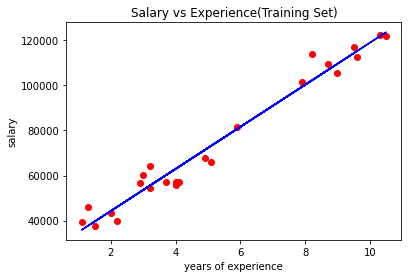

In [151]:
#training set
# plot real salary
plt.scatter(x_train,y_train,color='red')
# this help me to predit salary based on year of experience
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('years of experience')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

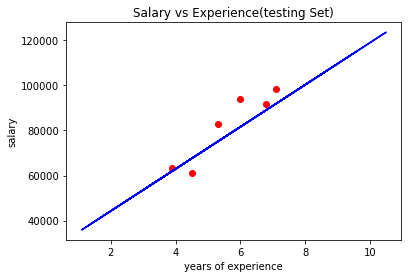

In [149]:
#testing set
# plot real salary
plt.scatter(x_test,y_test,color='red')
# this help me to predit salary based on year of experience
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience(testing Set)')
plt.xlabel('years of experience')
plt.ylabel('salary')

In [154]:
# making a single prediction for a 10yrs experience employee
print(regressor.predict([[10]]))

[118939.34537828]


In [155]:
print(regressor.coef_)
print(regressor.intercept_)

[9332.94473799]
25609.89799835482
